In [1]:
# ! py -m pip install seaborn
# ! py -m pip install sklearn

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
# from IPython.display import display

pd.plotting.register_matplotlib_converters()

df = pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Filling Age column NaNs with age mean 

In [4]:
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Filling Embarked column Nans with random values

In [5]:
df['Embarked'].isnull().sum()

2

In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].sample().iloc[0])

In [7]:
df['Embarked'].isnull().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Dropping cabin column due to insuficient number of data

In [9]:
df = df.drop(['Cabin'], axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Encoding Sex column (0-female, 1-male)

In [10]:
df['Sex'] = np.where(df['Sex'] == 'male', 1, 0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


#### Encoding Embarked column (1- S (Southampton), 2 - C (Cherbourg), 3- Q (Queenstown))

In [11]:
df['Embarked'].value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [12]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",1,32.000000,0,0,370376,7.75,Q


In [13]:
df['Embarked'] = np.where(df['Embarked'] == 'S', 1, (np.where(df['Embarked'] == 'C', 2, 3 )))
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.00,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.00,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.45,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.00,2
890,891,0,3,"Dooley, Mr. Patrick",1,32.000000,0,0,370376,7.75,3


#### Dropping Name column and Ticket (number) column as they seem irrelavant to constructing a model 

In [14]:
df = df.drop(['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


### Exploratory Data Analisys

#### Searching for corelations 

In [15]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030444
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.111203
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.040138
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.121266
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.012971
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.061591
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.080277
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.065492
Embarked,-0.030444,0.111203,0.040138,-0.121266,0.012971,-0.061591,-0.080277,0.065492,1.000000


<AxesSubplot:>

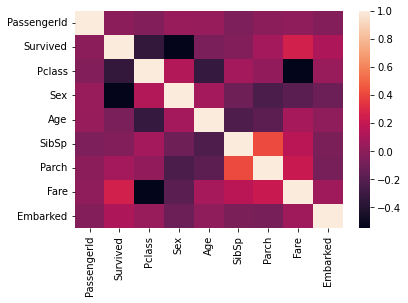

In [16]:
sns.heatmap(corr)

In [17]:
classes = df['Pclass'].value_counts()
classes

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0, 0.5, 'Number of passangers')

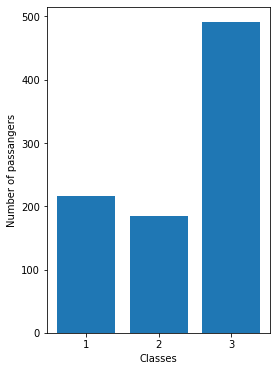

In [18]:
fig, ax  = plt.subplots(figsize=[4,6])

ax.bar(classes.index, classes, tick_label = classes.index)
plt.xlabel('Classes')
plt.ylabel('Number of passangers')

#### Counting survived passangers with division by class

##### By function:

In [19]:
def survived_by_class(df):
    
    survived_first_class = 0 
    survived_second_class = 0
    survived_third_class = 0
    
    for ind in df.index:
        if df['Survived'][ind] == 1:
            
            if df['Pclass'][ind] == 1:
                survived_first_class += 1
            
            elif df['Pclass'][ind] == 2:
                survived_second_class += 1
            
            elif df['Pclass'][ind] == 3:
                survived_third_class += 1
            
            else:
                pass
        else:
            pass
    
    return [survived_first_class, survived_second_class, survived_third_class]

In [20]:
survived_by_class= survived_by_class(df)
survived_by_class

[136, 87, 119]

##### By sum of elements:

In [21]:
survived_first_class = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 1), 'Survived'].sum() 
survived_second_class = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 2), 'Survived'].sum()
survived_third_class = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 3), 'Survived'].sum()
survived_by_class_list = [survived_first_class, survived_second_class, survived_third_class]
survived_by_class_list

[136, 87, 119]

#### Survival rate by class

In [22]:
rate_1 = (survived_by_class_list[0])/(df['Pclass'].value_counts()[1])
rate_2 = (survived_by_class_list[1])/(df['Pclass'].value_counts()[2])
rate_3 = (survived_by_class_list[2])/(df['Pclass'].value_counts()[3])
surv_rates_class = [rate_1, rate_2, rate_3]
surv_rates_class

[0.6296296296296297, 0.47282608695652173, 0.24236252545824846]

Text(0.5, 1.0, 'Survival rate by classes')

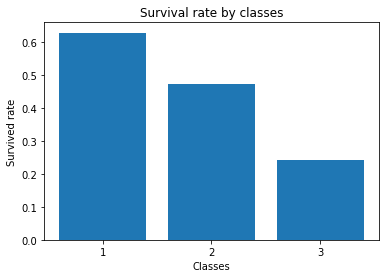

In [23]:
classes = df['Pclass'].value_counts()

fig, ax = plt.subplots()
ax.bar(classes.index.sort_values(), surv_rates_class, tick_label = classes.index.sort_values())

plt.xlabel("Classes")
plt.ylabel("Survived rate")
plt.title("Survival rate by classes")

## Training a model 

#### Prepearing training and testing sets

In [24]:
from sklearn.model_selection import train_test_split

y = df.pop('Survived')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### Logistic Regression model

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=0.01, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [26]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

#### Results on training set

In [27]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

def print_confusion_matrix(y_true, y_predict,
                           set_type='train',
                           cmap = None,
                           figsize=(7,7), 
                           label_font_size=14,
                           title_font_size=16
                          ):

    sns.set(rc ={'figure.figsize':figsize})
    cm = confusion_matrix(y_true, y_predict)

    ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)

    plt.xlabel('Prediction', fontsize=label_font_size)
    plt.ylabel('Truth', fontsize=label_font_size)
    plt.title('Confusion matrix- train set (Logistic Regression)', fontsize=title_font_size)
    plt.show()

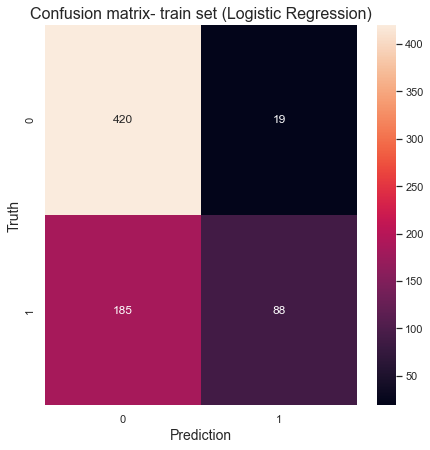

In [28]:
print_confusion_matrix(y_train, y_pred_train)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(true, prediction, average='macro'):
    accuracy = accuracy_score(true, prediction)
    precision = precision_score(true, prediction)
    recall = recall_score(true, prediction, average=average, zero_division=0)
    f1 = f1_score(true, prediction, average=average, zero_division=0)
    mislabeled = (true != prediction).sum()
    total = len(true)
    results = {'Accuracy':accuracy, 'Precision':precision, 'Recall': recall,
               'F1':f1, 'Mislabeled':mislabeled, 'Total':total}
    return  results

def print_metrics(metrics, classifier_id='classifier', data_type='training'):
    print(f'Results for {classifier_id} with {data_type} set, are....\n')
    for key in metrics:
        print(f'{key} : {metrics[key]}')

In [30]:
print_metrics(calculate_metrics(y_train, y_pred_train), data_type='training', classifier_id='Logistic Regression')

Results for Logistic Regression with training set, are....

Accuracy : 0.7134831460674157
Precision : 0.822429906542056
Recall : 0.6395320700559881
F1 : 0.6338777979431337
Mislabeled : 204
Total : 712


#### Results on test set

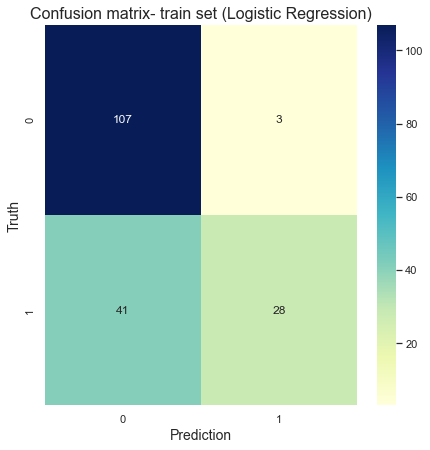

In [31]:
print_confusion_matrix(y_test, y_pred_test, cmap="YlGnBu")

In [32]:
print_metrics(calculate_metrics(y_test, y_pred_test),data_type='test', classifier_id='Logistic Regression')

Results for Logistic Regression with test set, are....

Accuracy : 0.7541899441340782
Precision : 0.9032258064516129
Recall : 0.689262187088274
F1 : 0.6947286821705426
Mislabeled : 44
Total : 179


#### Tuning the hyperparameters of the model

In [33]:
from sklearn.model_selection import GridSearchCV

C_values = [10.0**x for x in np.arange(-5, 1, 0.5)]
lr = LogisticRegression(penalty="l2", solver='liblinear')


searcher = GridSearchCV(estimator=lr, param_grid={'C': C_values}, cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1e-05, 3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.31622776601683794, 1.0,
                               3.1622776601683795]})

In [34]:
best_C = searcher.best_params_['C']
searcher.best_params_

{'C': 0.31622776601683794}

In [35]:
lr = LogisticRegression(penalty="l2", C=best_C, solver='liblinear')
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

#### Results on training set- after tuning

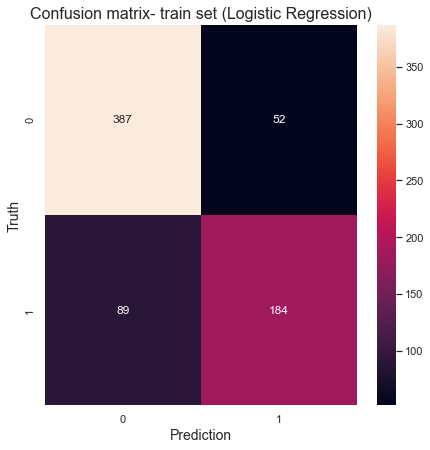

In [36]:
print_confusion_matrix(y_train, y_pred_train, set_type='train')

In [37]:
print_metrics(calculate_metrics(y_train, y_pred_train),data_type='train', classifier_id='Logistic Regression')

Results for Logistic Regression with train set, are....

Accuracy : 0.8019662921348315
Precision : 0.7796610169491526
Recall : 0.7777708244678632
F1 : 0.7844439434442334
Mislabeled : 141
Total : 712


#### Results on test set- after tuning

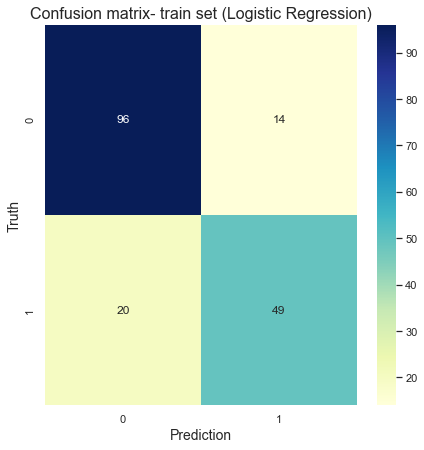

In [38]:
print_confusion_matrix(y_test, y_pred_test, set_type='test', cmap="YlGnBu")

In [39]:
print_metrics(calculate_metrics(y_test, y_pred_test),data_type='test', classifier_id='Logistic Regression')

Results for Logistic Regression with test set, are....

Accuracy : 0.8100558659217877
Precision : 0.7777777777777778
Recall : 0.7914361001317523
F1 : 0.7959908822740681
Mislabeled : 34
Total : 179


In [40]:
# print_results(calculate_metrics(y_train, y_pred_train, average='weighted'), classifier_id="LR C=0.001 TRAIN SET")
# print_results(calculate_metrics(y_test, y_pred, average='weighted'), classifier_id="LR C=0.001 TEST SET")

### Support Vector Machine (SVM) model

In [41]:
from sklearn import svm

svm_model = svm.SVC()

svm_model.fit(X_train, y_train)

SVC()

In [42]:
svm_y_train_pred = svm_model.predict(X_train)
svm_y_test_pred = svm_model.predict(X_test)

#### Results on train set

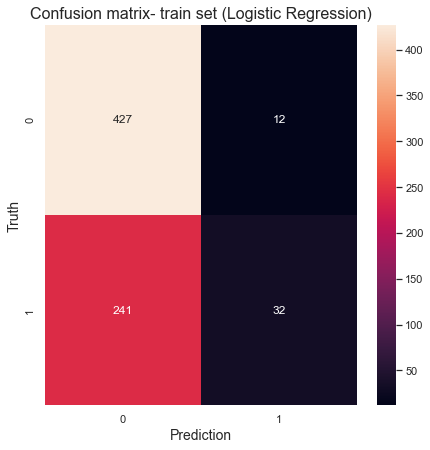

In [43]:
print_confusion_matrix(y_train, svm_y_train_pred, set_type='train') # , cmap="YlGnBu"

In [44]:
print_metrics(calculate_metrics(y_train, svm_y_train_pred),data_type='train', classifier_id='Support Vector Machine')

Results for Support Vector Machine with train set, are....

Accuracy : 0.6446629213483146
Precision : 0.7272727272727273
Recall : 0.5449406326399493
F1 : 0.48667356284498703
Mislabeled : 253
Total : 712


#### Results on test set

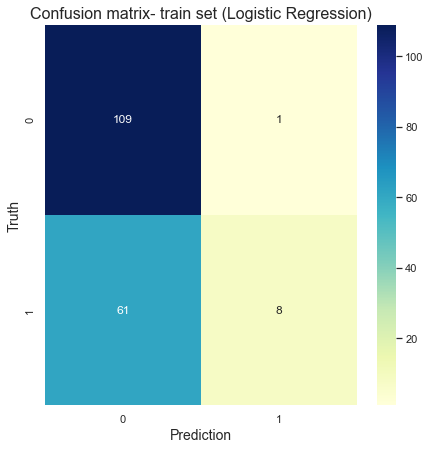

In [45]:
print_confusion_matrix(y_test, svm_y_test_pred, set_type='test', cmap="YlGnBu")

In [46]:
print_metrics(calculate_metrics(y_test, svm_y_test_pred),data_type='test', classifier_id='Support Vector Machine')

Results for Support Vector Machine with test set, are....

Accuracy : 0.6536312849162011
Precision : 0.8888888888888888
Recall : 0.5534255599472991
F1 : 0.4918498168498169
Mislabeled : 62
Total : 179


#### Tuning the hyperparameters of the model

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [48]:
current_params = svm_model.get_params()
current_params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [49]:
def get_current_svm_params(svm_model):
    all_params = svm_model.get_params()
    some_params = {'C':all_params['C'], 'gamma':all_params['gamma'], 'kernel': all_params['kernel']}
    return some_params

def print_params(params_dictionary):
    print("Model's params are:")
    print('C: ', params_dictionary['C'])
    print('gamma: ', params_dictionary['gamma'])
    print('kernel: ', params_dictionary['kernel'])
    

In [50]:
print_params(get_current_svm_params(svm_model))

Model's params are:
C:  1.0
gamma:  scale
kernel:  rbf


In [51]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf']} #, 'rbf', 'poly', 'sigmoid' ,  1, 10, 100

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [52]:
# param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['linear', 'sigmoid']} #, 'rbf', 'poly', 'sigmoid' ,  1, 10, 100

# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# grid.fit(X_train,y_train)

# param_grid = [
#     {"kernel": ["rbf"], "gamma": [1, 0.1, 0.01], "C": [0.1, 1, 10, 100]},
#     {"kernel": ["linear"], "C": [0.1, 1, 10, 100]},
# ]

# grid_search = GridSearchCV(
#     SVC(), param_grid, refit=True, verbose=3
# )
# grid_search.fit(X_train, y_train)

In [53]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.001)


In [54]:
svm_model_tuned = svm.SVC(C=1, gamma=0.001)

svm_model_tuned.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

In [55]:
svm_pred_train_tuned = svm_model.predict(X_train)
svm_pred_test_tuned = svm_model.predict(X_test)

#### Results on train set- tuned

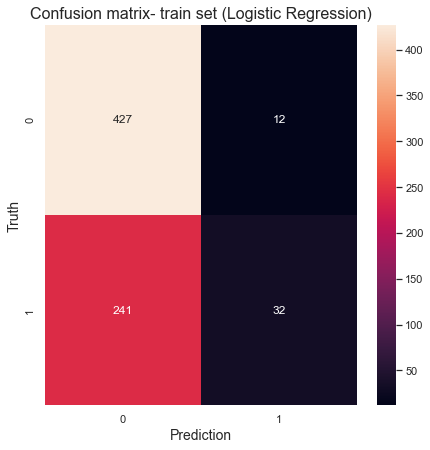

In [56]:
print_confusion_matrix(y_train, svm_pred_train_tuned, set_type='train') # , cmap="YlGnBu"

In [57]:
print_metrics(calculate_metrics(y_train, svm_pred_train_tuned),data_type='train', classifier_id='Support Vector Machine-tuned')

Results for Support Vector Machine-tuned with train set, are....

Accuracy : 0.6446629213483146
Precision : 0.7272727272727273
Recall : 0.5449406326399493
F1 : 0.48667356284498703
Mislabeled : 253
Total : 712


#### Results on test set- tuned

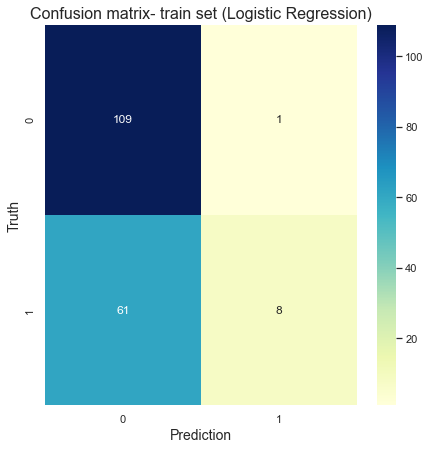

In [58]:
print_confusion_matrix(y_test, svm_pred_test_tuned, set_type='test', cmap="YlGnBu")

In [59]:
print_metrics(calculate_metrics(y_test, svm_pred_test_tuned),data_type='test', classifier_id='Support Vector Machine- tuned')

Results for Support Vector Machine- tuned with test set, are....

Accuracy : 0.6536312849162011
Precision : 0.8888888888888888
Recall : 0.5534255599472991
F1 : 0.4918498168498169
Mislabeled : 62
Total : 179


#### Testing different kernels

In [60]:
param_grid_sigmoid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['sigmoid']} #, 'rbf', 'poly', 'sigmoid'

grid = GridSearchCV(SVC(),param_grid_sigmoid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.613 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.613 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['sigmoid']},
             verbose=3)

In [61]:
svm_pred_train_sigmoid = svm_model.predict(X_train)
svm_pred_test_sigmoid = svm_model.predict(X_test)

In [62]:
print_metrics(calculate_metrics(y_train, svm_pred_train_sigmoid),
              data_type='train', 
              classifier_id='Support Vector Machine- tuned (sigmoid kernel)')

Results for Support Vector Machine- tuned (sigmoid kernel) with train set, are....

Accuracy : 0.6446629213483146
Precision : 0.7272727272727273
Recall : 0.5449406326399493
F1 : 0.48667356284498703
Mislabeled : 253
Total : 712


In [63]:
# param_grid_poly = {'C': [0.1, 1], 'gamma': [1, 0.1],'kernel': ['poly']} #, 'rbf', 'poly', 'sigmoid'

# grid = GridSearchCV(SVC(),param_grid_poly,refit=True,verbose=3)
# grid.fit(X_train,y_train)

In [64]:
parameters = {'kernel':('linear', 'rbf', 'sigmoid'), 'C':[0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]} # 'poly',
# C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'
svc_model = svm.SVC()
grid = GridSearchCV(svc_model, parameters, refit=True, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   9.8s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.734 total time=  12.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.817 total time=  11.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.761 total time=  15.4s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.824 total time=  13.2s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.613 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.804 total time=  20.9s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.734 total time=  12.8s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.817 total time=  15.0s
[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.768 total time=  14.7s
[CV 5/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.824 total time=  16.2s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.601 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.683 total time=   0.0s
[CV 4/5] END ......C=1, gamm

[CV 1/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.613 total time=   0.0s
[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.748 total time=  15.6s
[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.755 total time=  22.3s
[CV 3/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.768 total time=  23.1s
[CV 4/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.739 total time=  24.9s
[CV 5/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.845 total time=  27.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.573 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.483 total time=   0.0s
[CV 3/5] END .....C=100, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ('linear', 'rbf', 'sigmoid')},
             verbose=3)

In [65]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}